<h4 style = "text-align: right; color: #808080"> LSE Data Analytics Online Career Accelerator</h4>


<h1 style = "text-align: center; color: #4682B4"> DA201: Data Analytics using Python</h1>
<h2 style = "text-align: center; color: #4682B4">Assignment: COVID-19 data</h2>

## Scenario

As part of its goal to increase the number of fully vaccinated individuals (people who have received a first and second dose of the vaccine) against COVID-19, the UK government is planning to launch a series of marketing campaigns to promote the vaccine. The government wants to identify trends and patterns that can be used to inform its marketing approach to increase the number of fully vaccinated people.The government would like to understand:

- What the total vaccinations (first dose, second dose per region, total and overtime) are for a particular region.
- Where they should target the first marketing campaign(s) based on:
    - area(s) with the largest number of people who have received a first dose but no second dose
    - which area has the greatest number of recoveries so that they can avoid this area in their initial campaign runs
    - whether deaths have been increasing across all regions over time or if a peak has been reached.
- What other types of Twitter data points and tweets have both #coronavirus and #vaccinated hashtags.
- Which regions have experienced a peak in hospitalisation numbers and if there are regions that have not reached a peak yet. Demonstrate if the provided functions can assist you to answer these questions. Provide reasons for your answer.

## Environment preparation


In [1]:
# Import the required libraries and set the plotting options
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')
sns.set(rc = {'figure.figsize':(15,10)})

In [2]:
# Colour palette to make charts look better.
colorblind, = sns.color_palette("colorblind", 1) 

# Dark grid, white grid, dark, white, and ticks.
sns.set_style('whitegrid') 

# Font size of the axes titles.
plt.rc('axes', titlesize=18) 

# Font size of the x and y labels.
plt.rc('axes', labelsize=14)    

# Font size of the tick labels.
plt.rc('xtick', labelsize=13,color='#4f4e4e') 

# Font size of the tick labels.
plt.rc('ytick', labelsize=13,color='#4f4e4e')  

# Font size of the Legend.
plt.rc('legend', fontsize=13)

# Default text size.
plt.rc('font', size=13)          

## My Github Repo : 

- [Leela Gayatri Bhimaraju Github Repo](https://github.com/leela-b/LSE_DA201_assignment_COVID_analysis)
- Screenshot  :

<img src="github_repo_screenshot.png" alt="Github screenshot" />






## Loading and Exploring the data



In [3]:
# Loading the COVID-19 cases and vaccine data sets as cov and vac respectively
cov = pd.\
read_csv('https://raw.githubusercontent.com/leela-b/LSE_DA201_assignment_COVID_analysis/main/covid_19_uk_cases.csv')
vac = pd.\
read_csv('https://raw.githubusercontent.com/leela-b/LSE_DA201_assignment_COVID_analysis/main/covid_19_uk_vaccinated.csv')

In [4]:
# Viewing the first and last 5 rows of both the data frames
print(cov.head())
print(cov.tail())
print(vac.head())
print(vac.tail())

  Province/State  Country/Region      Lat     Long ISO 3166-1 Alpha 3-Codes  \
0       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
1       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
2       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
3       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
4       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   

                   Sub-region Name  Intermediate Region Code        Date  \
0  Latin America and the Caribbean                        29  2020-01-22   
1  Latin America and the Caribbean                        29  2020-01-23   
2  Latin America and the Caribbean                        29  2020-01-24   
3  Latin America and the Caribbean                        29  2020-01-25   
4  Latin America and the Caribbean                        29  2020-01-26   

   Deaths  Cases  Recovered  Hospitalised  
0     0.0    0.0        

In [5]:
# Determine the number of rows and columns in both dataframes
print(cov.shape)
print(vac.shape)

(7584, 12)
(7584, 11)


In [6]:
# Determine data types for both data frames
print(cov.dtypes, '\n')
print(vac.dtypes)

Province/State               object
Country/Region               object
Lat                         float64
Long                        float64
ISO 3166-1 Alpha 3-Codes     object
Sub-region Name              object
Intermediate Region Code      int64
Date                         object
Deaths                      float64
Cases                       float64
Recovered                   float64
Hospitalised                float64
dtype: object 

Province/State               object
Country/Region               object
Lat                         float64
Long                        float64
ISO 3166-1 Alpha 3-Codes     object
Sub-region Name              object
Intermediate Region Code      int64
Date                         object
Vaccinated                    int64
First Dose                    int64
Second Dose                   int64
dtype: object


In [7]:
# Determine number of missing values
print(cov.isna().sum())
print(vac.isna().sum())

Province/State              0
Country/Region              0
Lat                         0
Long                        0
ISO 3166-1 Alpha 3-Codes    0
Sub-region Name             0
Intermediate Region Code    0
Date                        0
Deaths                      2
Cases                       2
Recovered                   2
Hospitalised                2
dtype: int64
Province/State              0
Country/Region              0
Lat                         0
Long                        0
ISO 3166-1 Alpha 3-Codes    0
Sub-region Name             0
Intermediate Region Code    0
Date                        0
Vaccinated                  0
First Dose                  0
Second Dose                 0
dtype: int64


In [8]:
# Get rows that have missing values
cov[cov['Deaths'].isna()]

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised
875,Bermuda,United Kingdom,32.3078,-64.7505,BMU,Northern America,0,2020-09-21,NaN,NaN,NaN,NaN
876,Bermuda,United Kingdom,32.3078,-64.7505,BMU,Northern America,0,2020-09-22,NaN,NaN,NaN,NaN


<br>
<p  style = "font-size:16px; color: #4169E1"> Missing values are from Province/State: 'Bermuda' and columns: Deaths, Cases, Recovered and Hospitalised and on dates: 21-09-2020 ans 22-09-2020 </p><br>

In [9]:
# Replacing missing values with zero
cov = cov.fillna(0)

In [10]:
# Check for missing values after replacing
cov.isna().sum()

Province/State              0
Country/Region              0
Lat                         0
Long                        0
ISO 3166-1 Alpha 3-Codes    0
Sub-region Name             0
Intermediate Region Code    0
Date                        0
Deaths                      0
Cases                       0
Recovered                   0
Hospitalised                0
dtype: int64

In [11]:
# Checking for duplicates
cov[cov.duplicated()]

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised


In [12]:
# Checking for duplicates
vac[vac.duplicated()]

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Vaccinated,First Dose,Second Dose


In [13]:
# Create dataframe by filtering data for region Gibraltar
gibraltar_df = cov[cov['Province/State'] == 'Gibraltar']

# Viewing the dataframe
print(gibraltar_df)

     Province/State  Country/Region      Lat    Long ISO 3166-1 Alpha 3-Codes  \
3792      Gibraltar  United Kingdom  36.1408 -5.3536                      GIB   
3793      Gibraltar  United Kingdom  36.1408 -5.3536                      GIB   
3794      Gibraltar  United Kingdom  36.1408 -5.3536                      GIB   
3795      Gibraltar  United Kingdom  36.1408 -5.3536                      GIB   
3796      Gibraltar  United Kingdom  36.1408 -5.3536                      GIB   
...             ...             ...      ...     ...                      ...   
4419      Gibraltar  United Kingdom  36.1408 -5.3536                      GIB   
4420      Gibraltar  United Kingdom  36.1408 -5.3536                      GIB   
4421      Gibraltar  United Kingdom  36.1408 -5.3536                      GIB   
4422      Gibraltar  United Kingdom  36.1408 -5.3536                      GIB   
4423      Gibraltar  United Kingdom  36.1408 -5.3536                      GIB   

      Sub-region Name  Inte

In [14]:
# Selecting columns to view
gb_select = gibraltar_df[['Deaths','Cases', 'Recovered', 'Hospitalised', 'Date']]
print(gb_select)

      Deaths   Cases  Recovered  Hospitalised        Date
3792     0.0     0.0        0.0           0.0  2020-01-22
3793     0.0     0.0        0.0           0.0  2020-01-23
3794     0.0     0.0        0.0           0.0  2020-01-24
3795     0.0     0.0        0.0           0.0  2020-01-25
3796     0.0     0.0        0.0           0.0  2020-01-26
...      ...     ...        ...           ...         ...
4419    97.0  5626.0        0.0         858.0  2021-10-10
4420    97.0  5655.0        0.0         876.0  2021-10-11
4421    97.0  5682.0        0.0         876.0  2021-10-12
4422    97.0  5707.0        0.0           0.0  2021-10-13
4423    97.0  5727.0        0.0           0.0  2021-10-14

[632 rows x 5 columns]


In [15]:
# Generating descriptive statistics for selected columns in Gibraltar df
gb_select.describe()

,Deaths,Cases,Recovered,Hospitalised
count,632.000000,632.000000,632.000000,632.000000
mean,40.208861,2237.109177,1512.821203,1027.625000
std,45.332832,2136.268090,1817.096755,1145.681058
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,177.000000,109.500000,157.750000
50%,5.000000,1036.500000,323.500000,675.500000
75%,94.000000,4286.000000,4122.500000,1548.000000
max,97.000000,5727.000000,4670.000000,4907.000000


In [16]:
# Total number of Deaths, Cases, Recovered and Hospitalised in Gibraltar
gb_select.sum()

Deaths                                                    25412.0
Cases                                                   1413853.0
Recovered                                                956103.0
Hospitalised                                             649459.0
Date            2020-01-222020-01-232020-01-242020-01-252020-0...
dtype: object

<p  style = "font-size:16px; color: #4169E1"> Mean and sum of Recovered is greater than Hospitalised </p><br>

In [17]:
# Viewing selected columns and rows from the Gibraltar data
gibraltar_df.iloc[100:120,7:]

,Date,Deaths,Cases,Recovered,Hospitalised
3892,2020-05-01,0.0,144.0,131.0,1840.0
3893,2020-05-02,0.0,144.0,132.0,1798.0
3894,2020-05-03,0.0,144.0,132.0,1774.0
3895,2020-05-04,0.0,144.0,133.0,1762.0
3896,2020-05-05,0.0,144.0,133.0,1715.0
3897,2020-05-06,0.0,144.0,136.0,1644.0
3898,2020-05-07,0.0,144.0,141.0,1578.0
3899,2020-05-08,0.0,146.0,142.0,1507.0
3900,2020-05-09,0.0,146.0,142.0,1502.0
3901,2020-05-10,0.0,146.0,143.0,1466.0


<ul style = "font-size:16px; color: #4169E1">
    <li>Number of Hospitalised are more than number of cases </li>
    <li>Cases and Recovered numbers seem to be running totals but Hospitalised numbers do not seem cumulative</li>
    <li>Considering recoveries and cases are cumulative, looking at the difference does not allow hospitalised numbers to add up or match</li></ul><br>

##  Merging the data

In [18]:
# Viewing columns and number of rows before merging
print(cov.columns)
print(vac.columns)
print(cov.shape)
print(vac.shape)

Index(['Province/State', 'Country/Region', 'Lat', 'Long',
       'ISO 3166-1 Alpha 3-Codes', 'Sub-region Name',
       'Intermediate Region Code', 'Date', 'Deaths', 'Cases', 'Recovered',
       'Hospitalised'],
      dtype='object')
Index(['Province/State', 'Country/Region', 'Lat', 'Long',
       'ISO 3166-1 Alpha 3-Codes', 'Sub-region Name',
       'Intermediate Region Code', 'Date', 'Vaccinated', 'First Dose',
       'Second Dose'],
      dtype='object')
(7584, 12)
(7584, 11)


In [19]:
# Joining the DataFrames as covid where cov and vac are merged
covid = pd.merge(cov, vac, left_index=True, right_index=True)

In [20]:
# Explore the new DataFrame
print(covid.shape)
print(covid.head())
print(covid.columns)
print(covid.dtypes)

(7584, 23)
  Province/State_x Country/Region_x    Lat_x   Long_x  \
0         Anguilla   United Kingdom  18.2206 -63.0686   
1         Anguilla   United Kingdom  18.2206 -63.0686   
2         Anguilla   United Kingdom  18.2206 -63.0686   
3         Anguilla   United Kingdom  18.2206 -63.0686   
4         Anguilla   United Kingdom  18.2206 -63.0686   

  ISO 3166-1 Alpha 3-Codes_x                Sub-region Name_x  \
0                        AIA  Latin America and the Caribbean   
1                        AIA  Latin America and the Caribbean   
2                        AIA  Latin America and the Caribbean   
3                        AIA  Latin America and the Caribbean   
4                        AIA  Latin America and the Caribbean   

   Intermediate Region Code_x      Date_x  Deaths  Cases  ...  \
0                          29  2020-01-22     0.0    0.0  ...   
1                          29  2020-01-23     0.0    0.0  ...   
2                          29  2020-01-24     0.0    0.0  ..

In [21]:
# Clean up / drop unnecessary columns 
covid_clean = covid[['Province/State_x','Country/Region_x','Date_x','Deaths','Cases','Recovered',\
                    'Hospitalised','Vaccinated','First Dose','Second Dose']]
covid_clean.columns = ['Province/State','Country/Region','Date','Deaths','Cases','Recovered',\
                       'Hospitalised','Vaccinated','First Dose','Second Dose']

In [22]:
# Viewing cleaned dataframe
print(covid_clean.columns)
print(covid_clean.head())
covid_clean.dtypes

Index(['Province/State', 'Country/Region', 'Date', 'Deaths', 'Cases',
       'Recovered', 'Hospitalised', 'Vaccinated', 'First Dose', 'Second Dose'],
      dtype='object')
  Province/State  Country/Region        Date  Deaths  Cases  Recovered  \
0       Anguilla  United Kingdom  2020-01-22     0.0    0.0        0.0   
1       Anguilla  United Kingdom  2020-01-23     0.0    0.0        0.0   
2       Anguilla  United Kingdom  2020-01-24     0.0    0.0        0.0   
3       Anguilla  United Kingdom  2020-01-25     0.0    0.0        0.0   
4       Anguilla  United Kingdom  2020-01-26     0.0    0.0        0.0   

   Hospitalised  Vaccinated  First Dose  Second Dose  
0           0.0           0           0            0  
1           0.0           0           0            0  
2           0.0           0           0            0  
3           0.0           0           0            0  
4           0.0           0           0            0  


Province/State     object
Country/Region     object
Date               object
Deaths            float64
Cases             float64
Recovered         float64
Hospitalised      float64
Vaccinated          int64
First Dose          int64
Second Dose         int64
dtype: object

In [23]:
# Changing float data type to int.
covid_clean['Deaths'] = covid_clean['Deaths'].astype(np.int64)
covid_clean['Cases'] = covid_clean['Cases'].astype(np.int64)
covid_clean['Recovered'] = covid_clean['Recovered'].astype(np.int64)
covid_clean['Hospitalised'] = covid_clean['Hospitalised'].astype(np.int64)

In [24]:
# Fixing the date column data type
covid_clean['Date'] = pd.to_datetime(covid_clean['Date'], format='%Y-%m-%d')

# View data
covid_clean.head()

,Province/State,Country/Region,Date,Deaths,Cases,Recovered,Hospitalised,Vaccinated,First Dose,Second Dose
0,Anguilla,United Kingdom,2020-01-22,0,0,0,0,0,0,0
1,Anguilla,United Kingdom,2020-01-23,0,0,0,0,0,0,0
2,Anguilla,United Kingdom,2020-01-24,0,0,0,0,0,0,0
3,Anguilla,United Kingdom,2020-01-25,0,0,0,0,0,0,0
4,Anguilla,United Kingdom,2020-01-26,0,0,0,0,0,0,0


In [25]:
# Viewing data types after changing
covid_clean.dtypes

Province/State            object
Country/Region            object
Date              datetime64[ns]
Deaths                     int64
Cases                      int64
Recovered                  int64
Hospitalised               int64
Vaccinated                 int64
First Dose                 int64
Second Dose                int64
dtype: object

In [26]:
# Viewing last few rows
print(covid_clean.tail())

     Province/State  Country/Region       Date  Deaths    Cases  Recovered  \
7579         Others  United Kingdom 2021-10-10  137735  8154306          0   
7580         Others  United Kingdom 2021-10-11  137763  8193769          0   
7581         Others  United Kingdom 2021-10-12  137944  8231437          0   
7582         Others  United Kingdom 2021-10-13  138080  8272883          0   
7583         Others  United Kingdom 2021-10-14  138237  8317439          0   

      Hospitalised  Vaccinated  First Dose  Second Dose  
7579           378        1070        1216         1070  
7580           386        1300        1604         1300  
7581           386        1482        2027         1482  
7582             0           0           0            0  
7583             0           0           0            0  


### Checking for Outliers

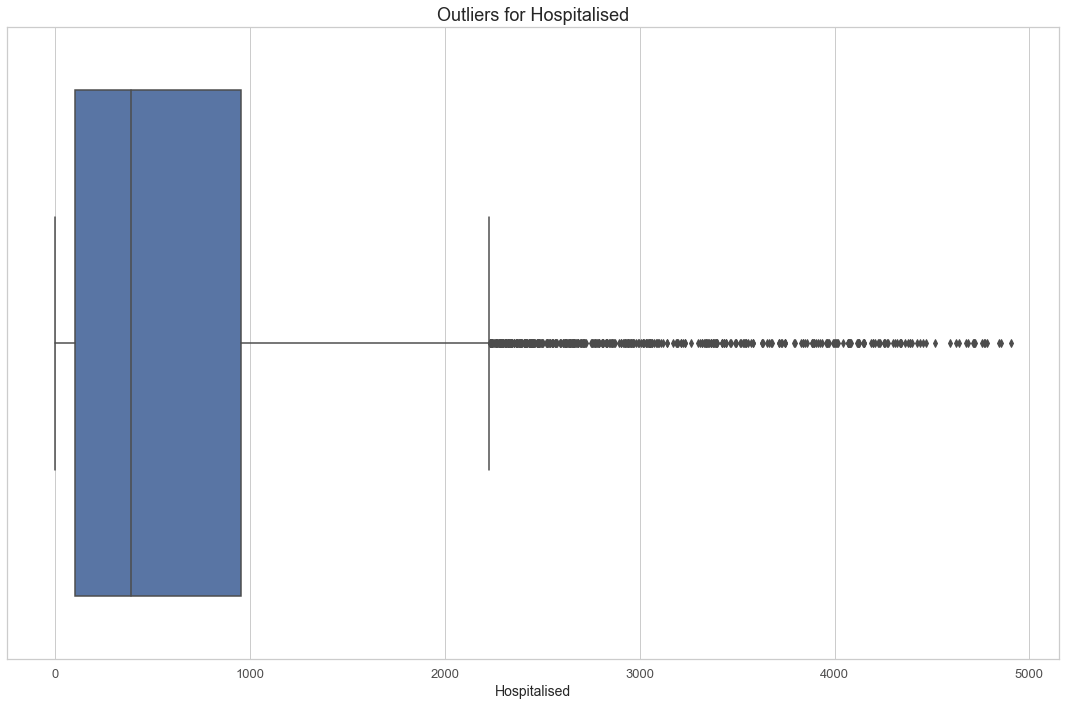

In [27]:
# Viewing boxplot for Hospitalised column to check outliers
ax = sns.boxplot(x="Hospitalised", data= covid_clean)
ax.set_title("Outliers for Hospitalised")
plt.tight_layout()
plt.savefig('hospitalised_boxplot.png')
plt.show()


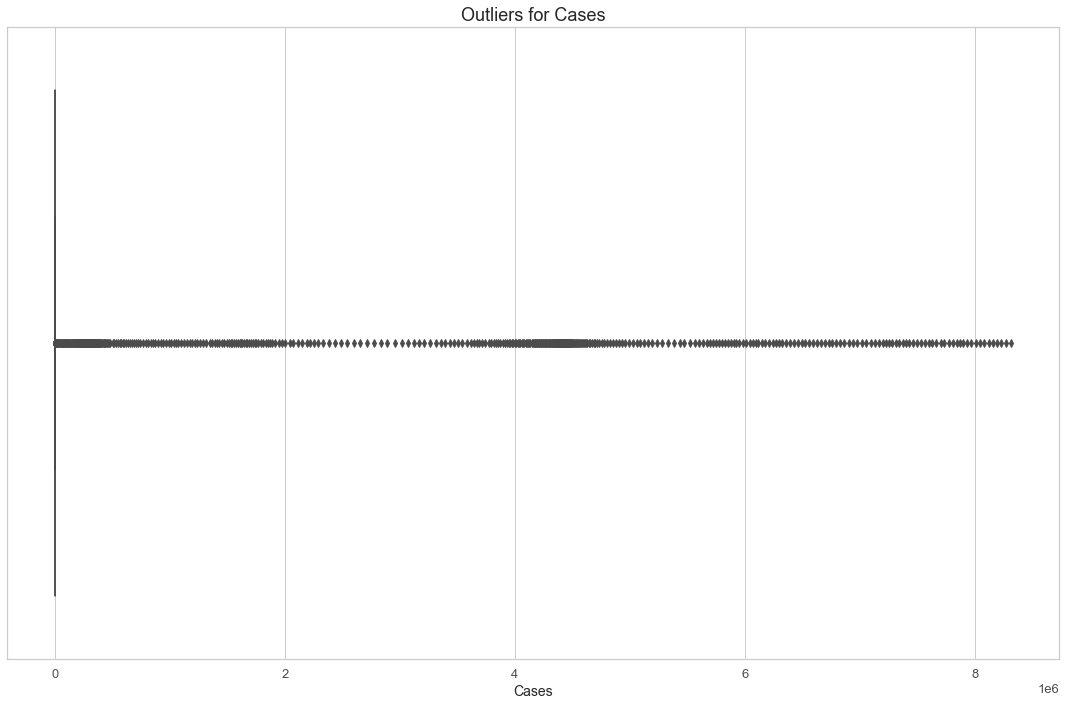

In [28]:
# Viewing boxplot for Cases column to check outliers
ax = sns.boxplot(x="Cases", data= covid_clean)
ax.set_title("Outliers for Cases")
plt.tight_layout()
plt.savefig('cases_boxplot.png')
plt.show()


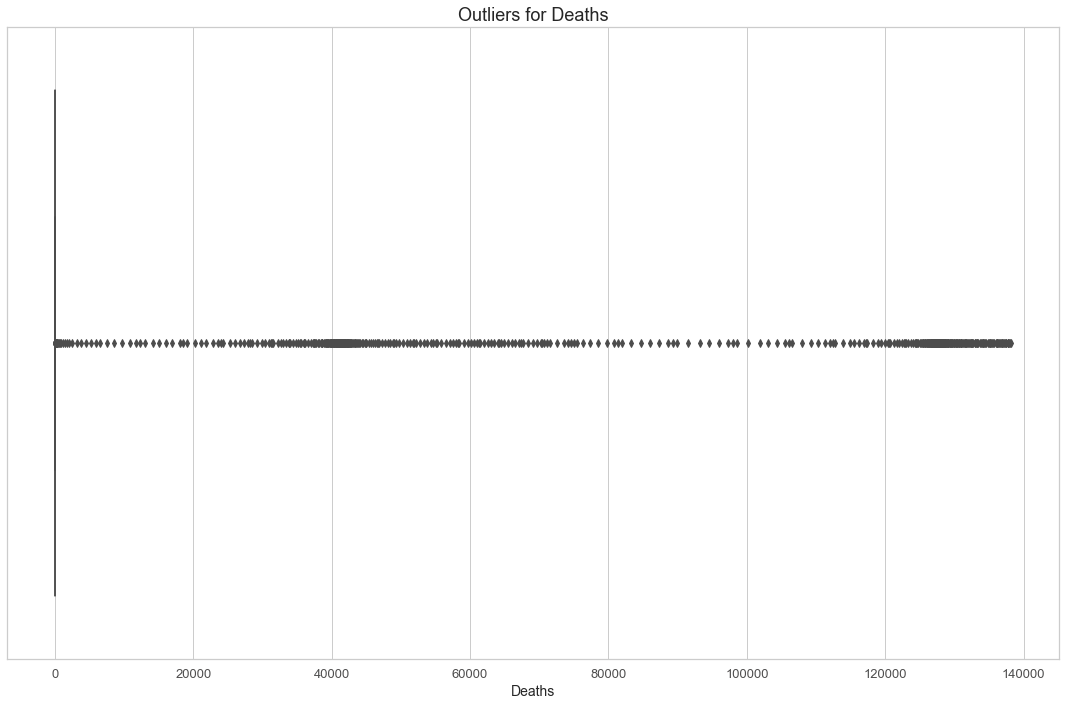

In [29]:
# Viewing boxplot for Deaths column to check outliers
ax = sns.boxplot(x="Deaths", data= covid_clean)
ax.set_title("Outliers for Deaths")
plt.tight_layout()
plt.savefig('deaths_boxplot.png')
plt.show()

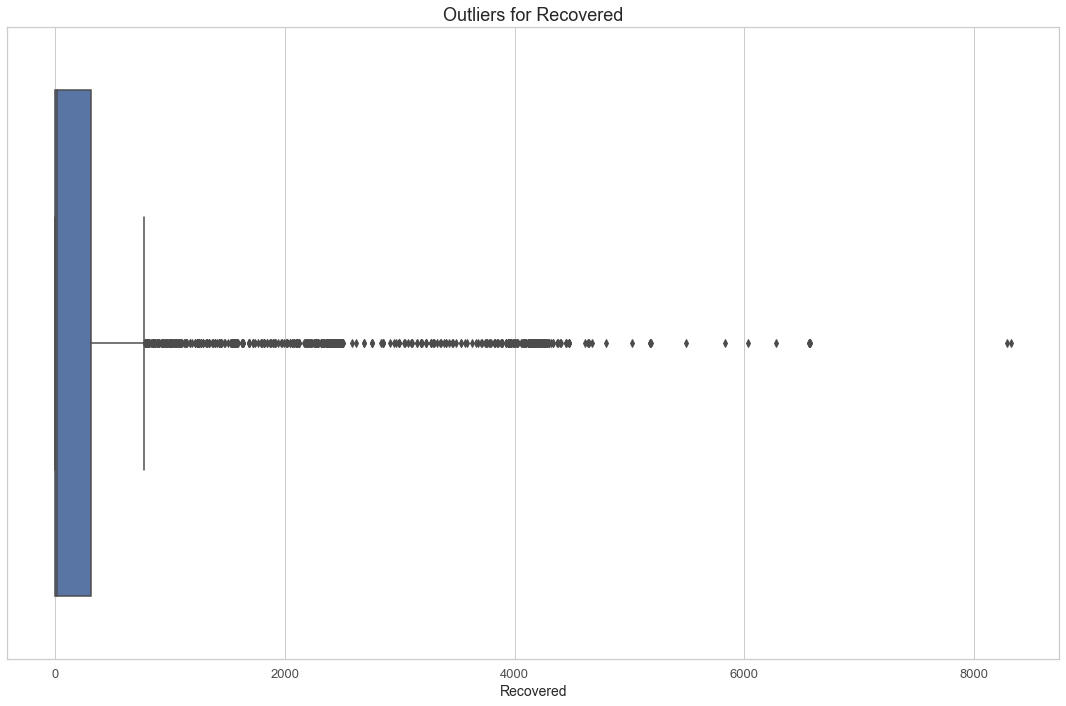

In [30]:
# Viewing boxplot for Recovered column to check outliers
ax = sns.boxplot(x="Recovered", data= covid_clean)
ax.set_title("Outliers for Recovered")
plt.tight_layout()
plt.savefig('recovered_boxplot.png')
plt.show()


## Exploring data after merging

In [31]:
# Adding a new column partially vaccinated which is difference between first and second dose
# i.e., number of people who have had first dose but no second dose

covid_clean['Partially Vaccinated'] = covid_clean['First Dose'] - covid_clean['Second Dose']
covid_clean.tail()

,Province/State,Country/Region,Date,Deaths,Cases,Recovered,Hospitalised,Vaccinated,First Dose,Second Dose,Partially Vaccinated
7579,Others,United Kingdom,2021-10-10,137735,8154306,0,378,1070,1216,1070,146
7580,Others,United Kingdom,2021-10-11,137763,8193769,0,386,1300,1604,1300,304
7581,Others,United Kingdom,2021-10-12,137944,8231437,0,386,1482,2027,1482,545
7582,Others,United Kingdom,2021-10-13,138080,8272883,0,0,0,0,0,0
7583,Others,United Kingdom,2021-10-14,138237,8317439,0,0,0,0,0,0


In [32]:
# View data for each Province/State by grouping
covid_state = covid_clean.groupby(['Province/State'])['Deaths','Cases', 'Recovered', 'Hospitalised','Vaccinated',\
                                                      'First Dose', 'Second Dose','Partially Vaccinated'].sum().\
reset_index().sort_values("Partially Vaccinated", ascending = False)

# Viewing dataframe
covid_state

,Province/State,Deaths,Cases,Recovered,Hospitalised,Vaccinated,First Dose,Second Dose,Partially Vaccinated
6,Gibraltar,25412,1413853,956103,649459,5606041,5870786,5606041,264745
8,Montserrat,539,9556,6376,597486,5157560,5401128,5157560,243568
2,British Virgin Islands,3573,284961,64359,571506,4933315,5166303,4933315,232988
0,Anguilla,24,35315,12708,545540,4709072,4931470,4709072,222398
7,Isle of Man,15051,887133,328319,467605,4036345,4226984,4036345,190639
5,Falkland Islands (Malvinas),0,20482,14754,415650,3587869,3757307,3587869,169438
3,Cayman Islands,911,217756,152052,389669,3363624,3522476,3363624,158852
4,Channel Islands,37130,1957978,1027626,363690,3139385,3287646,3139385,148261
11,Turks and Caicos Islands,5612,752618,515923,337710,2915136,3052822,2915136,137686
1,Bermuda,10353,685442,363999,311547,2690908,2817981,2690908,127073


<br><ul style = "font-size:16px; color: #4169E1">
    <li> Highest number of people who have received a first dose and not a second dose belong to 'Gibraltar' , followed by 'Montserrat' and 'British Virgin Islands'</li>
    <li> Number of hospitalised are more than cases in Anguilla, British Virgin Islands, Cayman islands, Falkland Islands, Montserrat, Saint Helena. The number of cases/deaths/recovered here are not right aggregated numbers as they are already cumulative in original data set. These columns are used in this result for the purpose of detecting anomalies</li>         
</ul>
<br>


In [33]:
# Create dataframe by filtering data for region Gibraltar
others_df = covid_clean[covid_clean['Province/State'] == 'Others']

# View selected rows in 'Others' Province/State
others_df.iloc[400:420,:]

,Province/State,Country/Region,Date,Deaths,Cases,Recovered,Hospitalised,Vaccinated,First Dose,Second Dose,Partially Vaccinated
7352,Others,United Kingdom,2021-02-25,122070,4154562,0,817,1943,26715,1943,24772
7353,Others,United Kingdom,2021-02-26,122415,4163085,0,774,1803,27747,1803,25944
7354,Others,United Kingdom,2021-02-27,122705,4170519,0,730,1503,22413,1503,20910
7355,Others,United Kingdom,2021-02-28,122849,4176554,0,703,1083,10224,1083,9141
7356,Others,United Kingdom,2021-03-01,122953,4182009,0,709,1556,11174,1556,9618
7357,Others,United Kingdom,2021-03-02,123296,4188400,0,668,2822,12375,2822,9553
7358,Others,United Kingdom,2021-03-03,123783,4194785,0,634,3765,15343,3765,11578
7359,Others,United Kingdom,2021-03-04,124025,4201358,0,601,3861,20693,3861,16832
7360,Others,United Kingdom,2021-03-05,124261,4207304,0,567,3122,24060,3122,20938
7361,Others,United Kingdom,2021-03-06,124419,4213343,0,534,1736,22926,1736,21190


In [34]:
# View maximun values for 'Others' Province/State
others_df.max()

Province/State                       Others
Country/Region               United Kingdom
Date                    2021-10-14 00:00:00
Deaths                               138237
Cases                               8317439
Recovered                               344
Hospitalised                           2159
Vaccinated                            30632
First Dose                            41377
Second Dose                           30632
Partially Vaccinated                  36318
dtype: object

<ul style = "font-size:16px; color: #4169E1">
    <li>'Others': Cases and Deaths numbers seem cumulative, but Hospitalised numbers do not seem cumulative. </li>
    <li>High number of deaths and very few hospitalised.</li>
    <li>Recovered max number is 344 which does not seem right considering the total number of cases.</li>     
    <li> Need to understand the Recovered field definition </li>
</ul><br>


In [35]:
# Viewing data for a sample month
covid_clean[covid_clean['Date'].dt.month ==5]

,Province/State,Country/Region,Date,Deaths,Cases,Recovered,Hospitalised,Vaccinated,First Dose,Second Dose,Partially Vaccinated
100,Anguilla,United Kingdom,2020-05-01,0,3,3,1546,0,0,0,0
101,Anguilla,United Kingdom,2020-05-02,0,3,3,1510,0,0,0,0
102,Anguilla,United Kingdom,2020-05-03,0,3,3,1490,0,0,0,0
103,Anguilla,United Kingdom,2020-05-04,0,3,3,1480,0,0,0,0
104,Anguilla,United Kingdom,2020-05-05,0,3,3,1441,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7443,Others,United Kingdom,2021-05-27,127758,4473677,0,48,23875,14108,23875,-9767
7444,Others,United Kingdom,2021-05-28,127768,4477705,0,49,23977,11244,23977,-12733
7445,Others,United Kingdom,2021-05-29,127775,4480945,0,49,23037,10094,23037,-12943
7446,Others,United Kingdom,2021-05-30,127781,4484056,0,50,11348,6869,11348,-4479


<br><ul  style = "font-size:16px; color: #4169E1"><li> Second dose and First dose numbers are not running totals</li>
<li>Second dose numbers on a date are higher than first dose numbers</li></ul>

## Web scraping to get population data

In [ ]:
# Install libraries.
#!pip install requests
#!pip install bs4
#!pip install lxml

In [36]:
# Import packages.
import pandas as pd
import requests
import bs4
import lxml

# Parse data with BeautifulSoup.
from bs4 import BeautifulSoup

In [37]:
# Get data from the internet by importing the url.
url = 'https://en.wikipedia.org/wiki/British_Overseas_Territories'
page = requests.get(url)

# Make contact with the website.
page

<Response [200]>

In [38]:
# Get the information from the website.
if page.status_code == 200:
    html_doc = page.content

# Look at the html code.
soup = BeautifulSoup(html_doc)

# Print the output in a readable format.
#print(soup.prettify()) # Commenting to upload to github, but used for working

In [39]:
# Navigate to the website and determine the table ID.
# The required table has a class
# check the classes for each table to identify the required table class

for table in soup.find_all('table'):
    print(table.get('class'))

['infobox', 'ib-pol-div', 'vcard']
['wikitable', 'sortable', 'noresize']
['sidebar', 'sidebar-collapse', 'nomobile', 'nowraplinks', 'vcard', 'hlist']
['wikitable']
['infobox', 'vcard']
['box-Original_research', 'plainlinks', 'metadata', 'ambox', 'ambox-content', 'ambox-Original_research']
['wikitable']
['nowraplinks', 'mw-collapsible', 'mw-collapsed', 'navbox-inner']
['nowraplinks', 'mw-collapsible', 'autocollapse', 'navbox-inner']
['nowraplinks', 'hlist', 'mw-collapsible', 'mw-collapsed', 'navbox-inner']
['nowraplinks', 'navbox-subgroup']
['nowraplinks', 'hlist', 'mw-collapsible', 'autocollapse', 'navbox-inner']
['nowraplinks', 'mw-collapsible', 'mw-collapsed', 'navbox-subgroup']
['nowraplinks', 'navbox-subgroup']
['nowraplinks', 'navbox-subgroup']
['nowraplinks', 'navbox-subgroup']
['nowraplinks', 'navbox-subgroup']
['nowraplinks', 'hlist', 'mw-collapsible', 'autocollapse', 'navbox-inner']
['nowraplinks', 'navbox-subgroup']
['nowraplinks', 'navbox-subgroup']
['nowraplinks', 'navbox-s

In [40]:
# Extract the contents of the table with the table class.
table = soup.find("table", class_= "wikitable sortable noresize")

# View the information in a readable format.
#print(table.prettify()) # Commenting to upload to github, but used for working

In [41]:
# Getting column names from table headers into a list
column_names = []

# Get all headings
headings = table.find_all('th')

# Extract text within each heading by stripping out unwanted charaters
column_names = [th.text.strip() for th in headings] 

# View column names
column_names

['Flag',
 'Arms',
 'Name',
 'Location',
 'Motto',
 'Area',
 'GDP(nominal)',
 'GDP percapita(nominal)',
 'Population',
 'Capital',
 'Notes',
 'Overall',
 '',
 '',
 'c. 1,727,415\xa0km2[citation needed]',
 'c. $16.55 billion',
 '',
 'c. 272,256[32]',
 '']

In [42]:
# All of the rows of the table.
rows = table.find_all("tr")

# View the rows.
#rows # Commenting to upload to github, but used for working

In [43]:
# Store the extracted data.
output = []

# Create a for loop statement.
for country in rows:
    country_data = country.find_all("td")
    if country_data:
        # Extract the text within each element.
        country_text = [td.text.strip() for td in country_data]
        output.append(dict(zip(column_names, country_text)))
        
# Create an output.
#output # Commenting to upload to github, but used for working

In [44]:
# Create a DataFrame.
data = pd.DataFrame(output)
data.head()

,Flag,Arms,Name,Location,Motto,Area,GDP(nominal),GDP percapita(nominal),Population,Capital,Notes
0,,,Anguilla,"Caribbean, North Atlantic Ocean","""Unity, Strength and Endurance""",91 km2 (35.1 sq mi)[7],$299 million,"$20,307","14,869 (2019 estimate)[8]",The Valley,
1,,,Bermuda,"North Atlantic Ocean between the Azores, the C...","""Quo fata ferunt"" (Latin; ""Whither the Fates c...",54 km2 (20.8 sq mi)[9],$6.464 billion,"$102,987","62,506 (2019 estimate)[10]",Hamilton,
2,,,British Antarctic Territory,Antarctica,"""Research and discovery""","1,709,400 km2 (660,000 sq mi)[7]",,,"050 non-permanent in winter, over 400 in summe...",Rothera (main base),Subject to the Antarctic Treaty System.
3,,,British Indian Ocean Territory,Indian Ocean,"""In tutela nostra Limuria"" (Latin; ""Limuria is...",60 km2 (23 sq mi)[12],,,"03,000 non-permanent (UK and US military and s...",Naval Support Facility Diego Garcia (base),Claimed by Mauritius.
4,,,British Virgin Islands,"Caribbean, North Atlantic Ocean","""Vigilate"" (Latin; ""Be watchful"")",153 km2 (59 sq mi)[14],$1.05 billion,"$48,511","31,758 (2018 census)[15]",Road Town,


In [45]:
# View data with selected columns
data_clean = data[['Name', 'Population']]
data_clean

,Name,Population
0,Anguilla,"14,869 (2019 estimate)[8]"
1,Bermuda,"62,506 (2019 estimate)[10]"
2,British Antarctic Territory,"050 non-permanent in winter, over 400 in summe..."
3,British Indian Ocean Territory,"03,000 non-permanent (UK and US military and s..."
4,British Virgin Islands,"31,758 (2018 census)[15]"
5,Cayman Islands,"69,656 (2021 census)[16]"
6,Falkland Islands,"3,377 (2019 estimate)[17]1,350 non-permanent (..."
7,Gibraltar,"33,701 (2019 estimate)[19]1,250 non-permanent ..."
8,Montserrat,"5,215 (2019 census)[21]"
9,"Pitcairn, Henderson, Ducie and Oeno Islands",50 (2018 estimate)[23]6 non-permanent (2014 es...


In [46]:
# Remove unwanted rows
data_clean.drop([2,3,9,11,12,13,14,15], axis=0, inplace=True)

# View dataframe
data_clean

,Name,Population
0,Anguilla,"14,869 (2019 estimate)[8]"
1,Bermuda,"62,506 (2019 estimate)[10]"
4,British Virgin Islands,"31,758 (2018 census)[15]"
5,Cayman Islands,"69,656 (2021 census)[16]"
6,Falkland Islands,"3,377 (2019 estimate)[17]1,350 non-permanent (..."
7,Gibraltar,"33,701 (2019 estimate)[19]1,250 non-permanent ..."
8,Montserrat,"5,215 (2019 census)[21]"
10,"Saint Helena, Ascension and Tristan da Cunha,i...","5,633 (total; 2016 census)"
16,Turks and Caicos Islands,"38,191 (2019 estimate)[31]"


In [47]:
# Extract the population numbers only in the Population column
data_clean['Population'] = data_clean['Population'].str.partition(" (")[0]

In [48]:
# Order results by Name
data_clean.sort_values("Name")

,Name,Population
0,Anguilla,"14,869"
1,Bermuda,"62,506"
4,British Virgin Islands,"31,758"
5,Cayman Islands,"69,656"
6,Falkland Islands,"3,377"
7,Gibraltar,"33,701"
8,Montserrat,"5,215"
10,"Saint Helena, Ascension and Tristan da Cunha,i...","5,633"
16,Turks and Caicos Islands,"38,191"


<ul style = "font-size:16px; color: #4169E1">
    <li>Population data is missing </li>
    <li>Population numbers do not match with total number of cases or hospitalised or doses</li>
    <li>The numbers are too high even to consider repeated positive cases, especially looking at number of doses</li>
</ul><br>




##  Visualizing the data



In [49]:
# Add a new column for % of indivduals who received a first dose but not second dose
covid_state['Difference %'] = (covid_state['First Dose'] - covid_state['Second Dose'])*100/covid_state['First Dose']

# Add a new column for % of individuals who received a second dose
covid_state['Second Dose %'] = (covid_state['Second Dose'])*100/covid_state['First Dose']

In [50]:
# Viewing dataframe with new columns
#covid_state
covid_state[['Province/State','Hospitalised','Vaccinated','First Dose','Second Dose',\
             'Partially Vaccinated', 'Difference %','Second Dose %']]

,Province/State,Hospitalised,Vaccinated,First Dose,Second Dose,Partially Vaccinated,Difference %,Second Dose %
6,Gibraltar,649459,5606041,5870786,5606041,264745,4.509532,95.490468
8,Montserrat,597486,5157560,5401128,5157560,243568,4.509577,95.490423
2,British Virgin Islands,571506,4933315,5166303,4933315,232988,4.509763,95.490237
0,Anguilla,545540,4709072,4931470,4709072,222398,4.509771,95.490229
7,Isle of Man,467605,4036345,4226984,4036345,190639,4.510048,95.489952
5,Falkland Islands (Malvinas),415650,3587869,3757307,3587869,169438,4.509560,95.490440
3,Cayman Islands,389669,3363624,3522476,3363624,158852,4.509669,95.490331
4,Channel Islands,363690,3139385,3287646,3139385,148261,4.509640,95.490360
11,Turks and Caicos Islands,337710,2915136,3052822,2915136,137686,4.510122,95.489878
1,Bermuda,311547,2690908,2817981,2690908,127073,4.509363,95.490637


In [51]:
# Reading covid_clean dataframe to new dfs to use for visualization
covid_clean_melt = covid_clean
covid_clean_melt2 = covid_clean
covid_clean_melt.tail()

,Province/State,Country/Region,Date,Deaths,Cases,Recovered,Hospitalised,Vaccinated,First Dose,Second Dose,Partially Vaccinated
7579,Others,United Kingdom,2021-10-10,137735,8154306,0,378,1070,1216,1070,146
7580,Others,United Kingdom,2021-10-11,137763,8193769,0,386,1300,1604,1300,304
7581,Others,United Kingdom,2021-10-12,137944,8231437,0,386,1482,2027,1482,545
7582,Others,United Kingdom,2021-10-13,138080,8272883,0,0,0,0,0,0
7583,Others,United Kingdom,2021-10-14,138237,8317439,0,0,0,0,0,0


In [52]:
# Using melt function on dataframe
covid_clean_melt = pd.melt(covid_clean_melt, id_vars =['Province/State', 'Country/Region', 'Date'],\
                           value_vars =['Partially Vaccinated', 'Vaccinated'])
covid_clean_melt.rename(columns = {'variable':'Type', 'value':'Count'}, inplace = True)


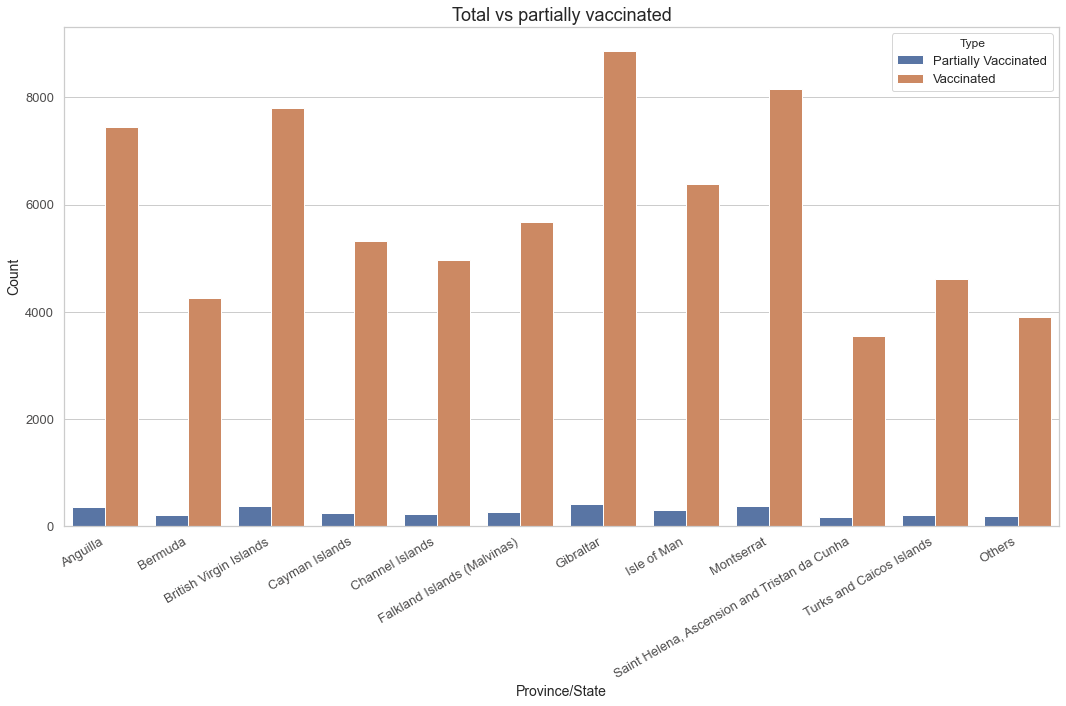

In [53]:
# Viewing bargraph for Total vaccinated vs Partially vaccinated
ax = sns.barplot(x='Province/State', y='Count', hue='Type', data=covid_clean_melt, ci=None)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30, ha='right')
ax.set_title("Total vs partially vaccinated")
plt.tight_layout()
plt.savefig('total_vs_partial.png')
plt.show()

In [54]:
# Using melt function on dataframe
covid_clean_melt2 = pd.melt(covid_clean_melt2, id_vars =['Province/State', 'Country/Region', 'Date'],\
                           value_vars =['First Dose', 'Second Dose'])
covid_clean_melt2.rename(columns = {'variable':'Type', 'value':'Count'}, inplace = True)


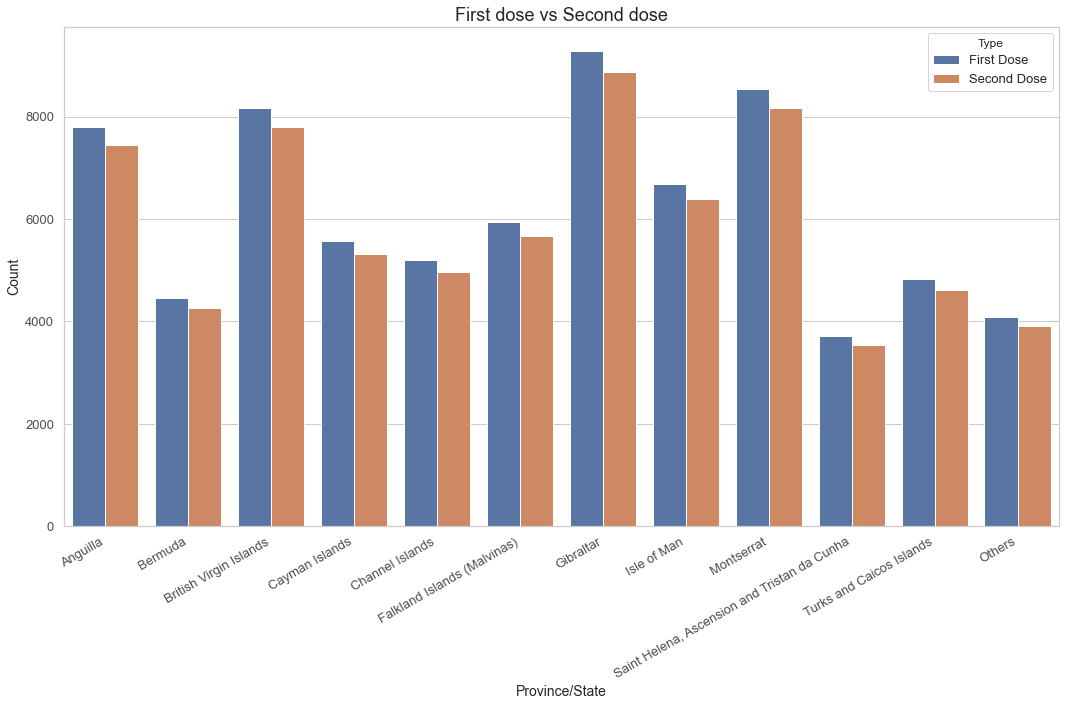

In [55]:
# Viewing bargraph for Total vaccinated vs Partially vaccinated
ax = sns.barplot(x='Province/State', y='Count', hue='Type', data=covid_clean_melt2, ci=None)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30, ha='right')
ax.set_title("First dose vs Second dose")
plt.tight_layout()
plt.savefig('first_vs_second.png')
plt.show()

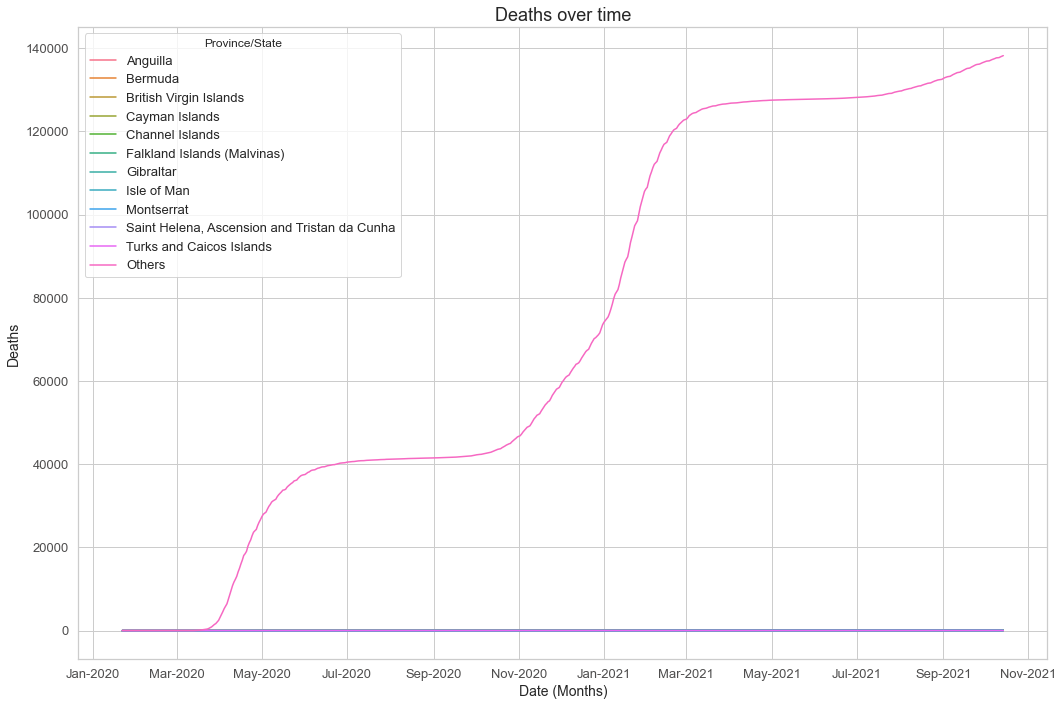

In [57]:
# Viewing line plot for Deaths over time for each Province/State
ax = sns.lineplot(y='Deaths', x='Date', hue='Province/State', \
                  data=covid_clean, ci=None)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
ax.set_xlabel("Date (Months)")
ax.set_title("Deaths over time")
plt.tight_layout()
plt.savefig('deaths_lineplot.png')
plt.show()

In [58]:
# Checking values to identify Province causing skewed result
covid_clean.groupby(['Province/State'])['Deaths'].max()

Province/State
Anguilla                                             1
Bermuda                                             95
British Virgin Islands                              37
Cayman Islands                                       2
Channel Islands                                    100
Falkland Islands (Malvinas)                          0
Gibraltar                                           97
Isle of Man                                         54
Montserrat                                           1
Others                                          138237
Saint Helena, Ascension and Tristan da Cunha         1
Turks and Caicos Islands                            23
Name: Deaths, dtype: int64

In [59]:
# Creating a subset df exclusing Others Province/State

covid_deaths_subset = covid_clean[covid_clean['Province/State'] != 'Others']
covid_deaths_subset

,Province/State,Country/Region,Date,Deaths,Cases,Recovered,Hospitalised,Vaccinated,First Dose,Second Dose,Partially Vaccinated
0,Anguilla,United Kingdom,2020-01-22,0,0,0,0,0,0,0,0
1,Anguilla,United Kingdom,2020-01-23,0,0,0,0,0,0,0,0
2,Anguilla,United Kingdom,2020-01-24,0,0,0,0,0,0,0,0
3,Anguilla,United Kingdom,2020-01-25,0,0,0,0,0,0,0,0
4,Anguilla,United Kingdom,2020-01-26,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6947,Turks and Caicos Islands,United Kingdom,2021-10-10,23,2898,0,446,1264,1437,1264,173
6948,Turks and Caicos Islands,United Kingdom,2021-10-11,23,2898,0,456,1536,1896,1536,360
6949,Turks and Caicos Islands,United Kingdom,2021-10-12,23,2898,0,456,1751,2395,1751,644
6950,Turks and Caicos Islands,United Kingdom,2021-10-13,23,2905,0,0,0,0,0,0


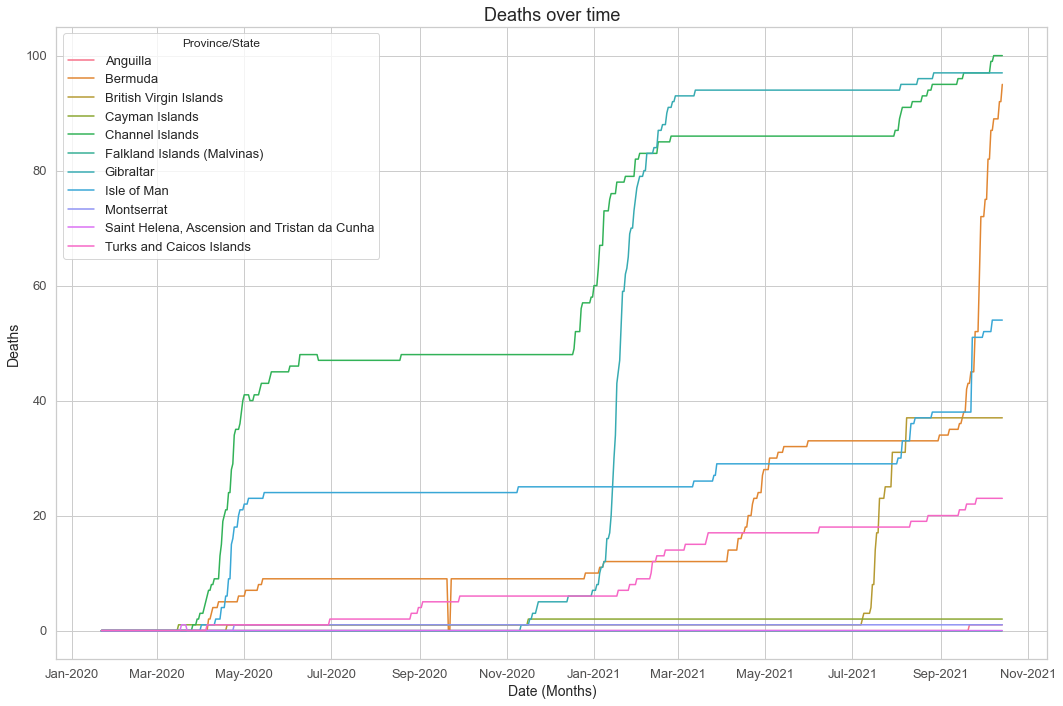

In [60]:
# Viewing line plot for Deaths over time for each Province/State
ax = sns.lineplot(y='Deaths', x='Date', hue='Province/State', \
                  data=covid_deaths_subset, ci=None)
ax.set_xlabel("Date (Months)")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
ax.set_title("Deaths over time")
plt.tight_layout()
plt.savefig('deaths_subset_lineplot.png')
plt.show()

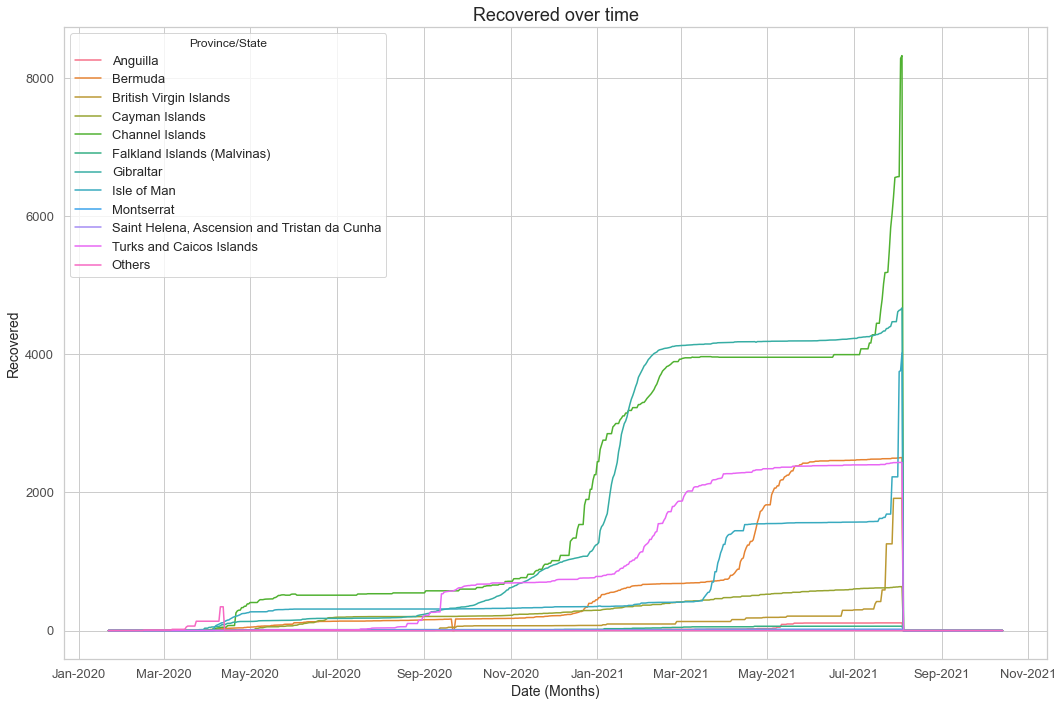

In [61]:
# Viewing Recovered over time
ax = sns.lineplot(y='Recovered', x='Date', hue='Province/State', \
                  data=covid_clean, ci=None)
ax.set_xlabel("Date (Months)")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
ax.set_title("Recovered over time")
plt.tight_layout()
plt.savefig('recovered_lineplot.png')
plt.show()

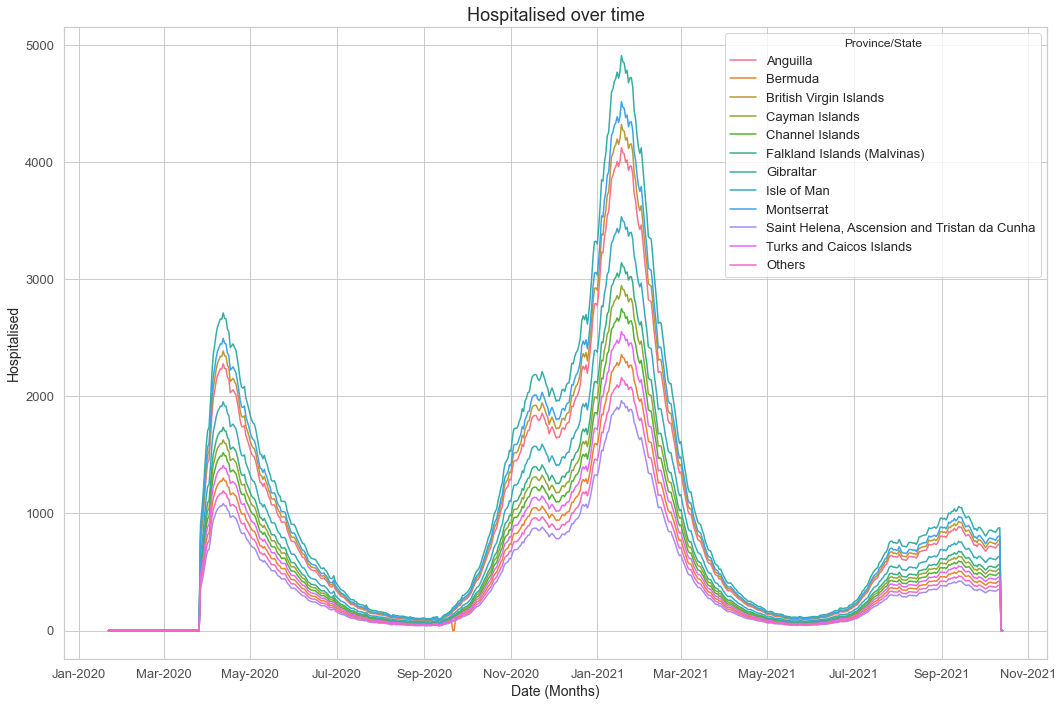

In [62]:
# Viewing Hospitalised over time
ax = sns.lineplot(y='Hospitalised', x='Date', hue='Province/State', \
                  data=covid_clean, ci=None)
ax.set_xlabel("Date (Months)")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
ax.set_title("Hospitalised over time")
plt.tight_layout()
plt.savefig('hospitalised_lineplot.png')
plt.show()

In [63]:
# Viewing Hospitalised numbers for each Province/State
covid_clean.groupby(['Province/State'])[['Hospitalised']].max().sort_values('Hospitalised', ascending = False)

,Hospitalised
Province/State,
Gibraltar,4907
Montserrat,4514
British Virgin Islands,4318
Anguilla,4122
Isle of Man,3533
Falkland Islands (Malvinas),3140
Cayman Islands,2944
Channel Islands,2748
Turks and Caicos Islands,2552


In [64]:
# Viewing Deaths numbers for each Province/State
covid_clean.groupby(['Province/State'])[['Deaths']].max().sort_values('Deaths', ascending = False)

,Deaths
Province/State,
Others,138237
Channel Islands,100
Gibraltar,97
Bermuda,95
Isle of Man,54
British Virgin Islands,37
Turks and Caicos Islands,23
Cayman Islands,2
Anguilla,1


In [65]:
# Viewing Recovered numbers for each Province/State
covid_clean.groupby(['Province/State'])[['Recovered']].max().sort_values('Recovered')

,Recovered
Province/State,
"Saint Helena, Ascension and Tristan da Cunha",4
Montserrat,19
Falkland Islands (Malvinas),63
Anguilla,111
Others,344
Cayman Islands,635
British Virgin Islands,1914
Turks and Caicos Islands,2433
Bermuda,2503


<ul style = "font-size:16px; color: #4169E1">
    <li>Montserrat in least 3 in Recovered numbers, Saint Helena and Falkland islands being the other two </li>
    <li>Gibraltar in highest 3 in Deaths numbers</li>
    <li>Gibraltar, Montserrat and British Virgin Islands have highest in Hospitalised numbers</li>
    <li>The above are among highest 3 for number of individuals who had first dose but no second dose from earlier result by Province/State </li>
</ul><br>

## Sample Tweets data 


In [66]:
# Importing the tweet data set
tweets = pd.read_csv('tweets.csv')

# Exploring the data
tweets.head()

,created_at,id,id_str,text,truncated,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,possibly_sensitive,quoted_status_id,quoted_status_id_str
0,23/05/2022,1.528750e+18,1.528750e+18,READ MY NEW OP-ED: IRREVERSIBLE – Many Effects...,False,"<a href=""https://www.socialjukebox.com"" rel=""n...",NaN,NaN,NaN,NaN,...,NaN,False,0,0,False,False,en,False,NaN,NaN
1,23/05/2022,1.528720e+18,1.528720e+18,#COVID19 is linked to more #diabetes diagnoses...,False,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,...,NaN,False,0,1,False,False,en,False,NaN,NaN
2,23/05/2022,1.528650e+18,1.528650e+18,READ MY NEW OP-ED: IRREVERSIBLE – Many Effects...,False,"<a href=""https://www.socialjukebox.com"" rel=""n...",NaN,NaN,NaN,NaN,...,NaN,False,0,0,False,False,en,False,NaN,NaN
3,23/05/2022,1.528610e+18,1.528610e+18,READ MY NEW OP-ED: IRREVERSIBLE – Many Effects...,False,"<a href=""https://www.socialjukebox.com"" rel=""n...",NaN,NaN,NaN,NaN,...,NaN,False,0,0,False,False,en,False,NaN,NaN
4,23/05/2022,1.528600e+18,1.528600e+18,Advanced healthcare at your fingertips\nhttps:...,False,"<a href=""https://about.twitter.com/products/tw...",NaN,NaN,NaN,NaN,...,NaN,False,0,0,False,False,en,False,NaN,NaN


In [67]:
# Exploring the data
print(tweets.shape)
print(tweets.info())

(3960, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   created_at                 3959 non-null   object 
 1   id                         3959 non-null   float64
 2   id_str                     3959 non-null   float64
 3   text                       3959 non-null   object 
 4   truncated                  3959 non-null   object 
 5   source                     3959 non-null   object 
 6   in_reply_to_status_id      0 non-null      float64
 7   in_reply_to_status_id_str  0 non-null      float64
 8   in_reply_to_user_id        0 non-null      float64
 9   in_reply_to_user_id_str    0 non-null      float64
 10  in_reply_to_screen_name    0 non-null      float64
 11  contributors               0 non-null      float64
 12  is_quote_status            3959 non-null   object 
 13  retweet_count              3960 non-n

In [68]:
# Checking for missing values
tweets.isna().sum()

created_at                      1
id                              1
id_str                          1
text                            1
truncated                       1
source                          1
in_reply_to_status_id        3960
in_reply_to_status_id_str    3960
in_reply_to_user_id          3960
in_reply_to_user_id_str      3960
in_reply_to_screen_name      3960
contributors                 3960
is_quote_status                 1
retweet_count                   0
favorite_count                  0
favorited                       1
retweeted                       1
lang                            1
possibly_sensitive            830
quoted_status_id             3960
quoted_status_id_str         3960
dtype: int64

In [69]:
# Checking the retweet counts column
tweets.retweet_count.value_counts()

0      2818
1       570
2       190
3        96
4        54
       ... 
49        1
33        1
261       1
212       1
52        1
Name: retweet_count, Length: 67, dtype: int64

In [70]:
# Checking the fouvorite counts column
tweets.favorite_count.value_counts()

0       2240
1        682
2        252
3        174
4        100
        ... 
41         1
116        1
741        1
3433       1
301        1
Name: favorite_count, Length: 117, dtype: int64

In [71]:
# Set text data type to string
tweets['text'] = tweets['text'].astype(str)

# Create a DataFrame with the text only
tweets_text = tweets['text'].apply(lambda x: x if x.strip() != None else None)

In [72]:
# Viewing text values
tweets_text.values

array(['READ MY NEW OP-ED: IRREVERSIBLE – Many Effects Of COVID19 Are Permanent\nEvidence shows that COVID19 may cause extreme damage to the brain, kidneys, lungs, liver, heart, &amp; can cause amputations from blood clots, onset diabetes,&amp; erectile dysfunction.\nhttps://t.co/shBvjpzR9U 05 https://t.co/eOzCuQtd2Z',
       '#COVID19 is linked to more #diabetes diagnoses in kids, CDC study finds https://t.co/H5lO1W7Skd via @YouTube',
       'READ MY NEW OP-ED: IRREVERSIBLE – Many Effects Of COVID19 Are Permanent\nEvidence shows that COVID19 may cause extreme damage to the brain, kidneys, lungs, liver, heart, &amp; can cause amputations from blood clots, onset diabetes,&amp; erectile dysfunction.\nhttps://t.co/shBvjpzR9U 56',
       ...,
       'NORTHERN IRELAND.  Announced on TUESDAY.\n\nCOVID-19 DEATHS SUMMARY. \n\n2 further deaths have been recorded in Northern Ireland, bringing the total reported by the Department of Health to 3,440.\n\n#coronavirus disease 2019 (COVID-19) #COVID1

In [73]:
# Loop through the messages and build a list of values containing the #-symbol
tags = []
for y in [x.split(" ") for x in tweets_text.values]:
    for z in y:
        if "#" in z:
            tags.append(z)        

# Create a series from the tags list
tags = pd.Series(tags).value_counts()
tags.head(10)

#COVID19            1632
#CovidIsNotOver      472
#China               262
#covid19             176
#Covid19             148
#COVID               108
#covid               104
#Greece              103
#coronavirus         100
#PeoplesVaccine.      84
dtype: int64

In [74]:
# Create a dataframe from the series
tweets_df = pd.DataFrame(tags).reset_index()

# View dataframe
tweets_df

,index,0
0,#COVID19,1632
1,#CovidIsNotOver,472
2,#China,262
3,#covid19,176
4,#Covid19,148
...,...,...
4771,hospital.\n#CovidIsNotOver,1
4772,#OmicronIsNotMild,1
4773,#Covid19NSW,1
4774,#CovidNSW,1


In [75]:
# Rename columns
tweets_df.columns = ['tag', 'count']

# Set count data type to int
tweets_df['count'] = tweets_df['count'].astype(np.int64)

# View data
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4776 entries, 0 to 4775
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tag     4776 non-null   object
 1   count   4776 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 74.8+ KB


In [76]:
# Display records for count larger than 100
tweets_plot = tweets_df[tweets_df['count'] >= 100]
tweets_plot

,tag,count
0,#COVID19,1632
1,#CovidIsNotOver,472
2,#China,262
3,#covid19,176
4,#Covid19,148
5,#COVID,108
6,#covid,104
7,#Greece,103
8,#coronavirus,100


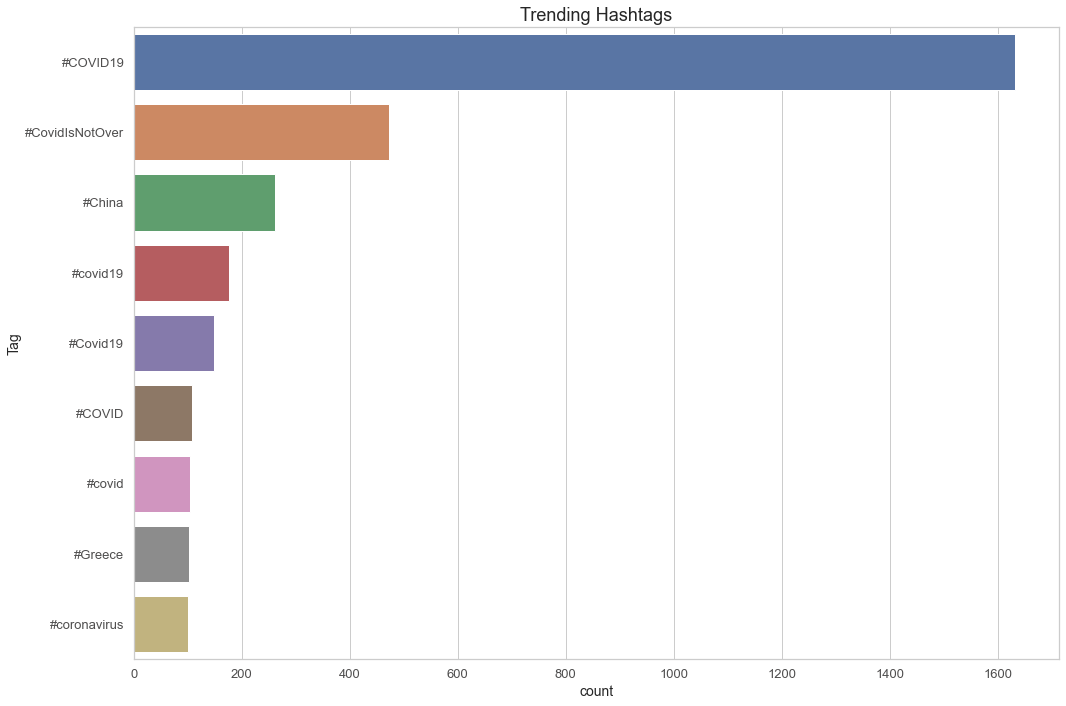

In [77]:
# Plot a barchart for trending hashtags
ax = sns.barplot(x="count", y="tag", data=tweets_plot)
ax.set_title("Trending Hashtags")
ax.set_ylabel("Tag")
plt.tight_layout()
plt.savefig('hashtags.png')
plt.show()

## Partial notebook interpretation




### Given code

In [ ]:
# Load and select relevant subset of the data
# Make sure to change the relative path to function in your environment

#ds1 = pd.read_csv('covid_19_uk_cases.csv')
#ds2 = pd.read_csv('covid_19_uk_vaccinated.csv')
#ds2 = pd.read_csv('git/assignment/covid_19_uk_vaccinated.csv')

#sample = ds1[['Province/State','Date','Hospitalised']]

# Select data for a specific province
#sample_ci = sample[sample['Province/State'] == "Channel Islands"]


In [78]:
# Define function to plot moving averages
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):
    
    # Create a rolling window to calculate the rolling mean using the series.rolling function
    rolling_mean = series.rolling(window=window).mean()
    
    # Declare the dimensions for the plot, plot name and plot the data consisting of the rolling mean from above 
    plt.figure(figsize=(18,4))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Simple moving average trend')

    
    # Plot confidence intervals for smoothed values
    if plot_intervals:
        
        # Calculate the mean absolute square 
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        
        # Calculate the standard deviation using numpy's std function
        deviation = np.std(series[window:] - rolling_mean[window:])
        
        # Calculate the upper and lower bounds 
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        
        # Name and style upper and lower bound lines and labels 
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
    
    # Plot the actual values for the entire timeframe
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best') # added by me
    plt.savefig('SMA_plot.png')
    plt.grid(True)
    
# Define function to calculate the mean absolute error
def mean_absolute_error(a, b): return abs(b - a)

### My code as answer to the questions below

### Question 1:

The consultant indicated that the function is functional, but did not demonstrate how to use it. Use the provided function, `plot_moving_average()`, to plot the data for the selected province (variable name is `sample_ci` and set the window parameter to 7 days. 

In [79]:
# Replacing code in Partial notebook with the dataframe used by me in the analysis until now 
# by using 'cov' instead of 'ds1' given in the template code above.
# Hence commented the template code to avoid confusion.

sample = cov[['Province/State','Date','Hospitalised']]

# Select data for a specific province
sample_ci = sample[sample['Province/State'] == "Channel Islands"]

             Province/State       Date  Hospitalised  SMA_7
Date                                                       
2020-01-22  Channel Islands 2020-01-22           0.0    NaN
2020-01-23  Channel Islands 2020-01-23           0.0    NaN
2020-01-24  Channel Islands 2020-01-24           0.0    NaN
2020-01-25  Channel Islands 2020-01-25           0.0    NaN
2020-01-26  Channel Islands 2020-01-26           0.0    NaN
2020-01-27  Channel Islands 2020-01-27           0.0    NaN
2020-01-28  Channel Islands 2020-01-28           0.0    0.0
2020-01-29  Channel Islands 2020-01-29           0.0    0.0
2020-01-30  Channel Islands 2020-01-30           0.0    0.0
2020-01-31  Channel Islands 2020-01-31           0.0    0.0


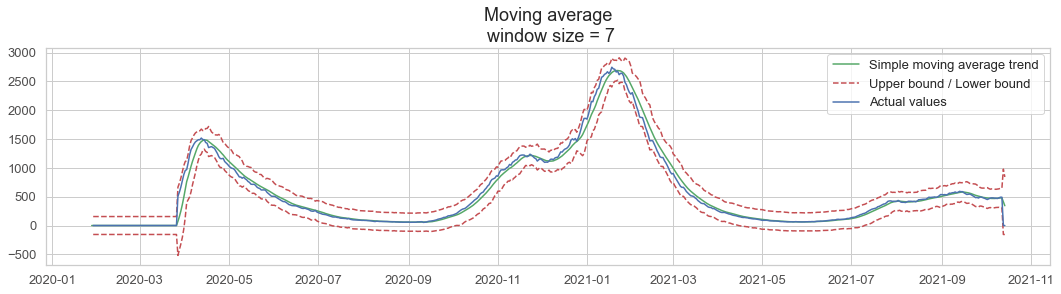

In [80]:
# Demonstrate the use of the function to plot moving averages

# Format date column
sample_ci['Date'] = pd.to_datetime(sample_ci['Date'], format='%Y-%m-%d')

# Setting the date column as index 
sample_ci.index = sample_ci['Date']

# Rolling window calculation for 7 days
sample_ci['SMA_7'] = sample_ci.iloc[:, 2].rolling(window=7).mean()

# Viewing the first few rows
print(sample_ci.head(10))

# Calling the user defined function for a window of 7 days
plot_moving_average(sample_ci.Hospitalised, 7, plot_intervals=True)


### Answer: 

<p style="color : #4169E1">The user defined function takes a series, a window frame, plot_intervals and scale as arugments. It is used to calculate and plot 'Simple moving average' for the column in the dataframe for the window of given number of entries in the date column, in this case days, which are passed as arguments to the functions.<br> The code written above by me calls the function to calculate and plot the 'Simple moving average' for the 'Hospitalised' column in the data frame with 'Channel Islands' data for a window of 7 days. It also establishes the confidence intervals when plot_intervals is set to true.</p>

### Question 2:

The consultant performed a calculation that looks interesting, but the team is unsure about what the intention was and how to interpret the output. Can you offer some insights into the meaning of the code and output in the cell below? Is it useful?

In [81]:
# Return the top three days with biggest difference between daily value and rolling 7-day mean
s = sample_ci.copy()
s_rolling = s['Hospitalised'].rolling(window=7).mean()
s['error'] = mean_absolute_error(s['Hospitalised'][7:], s_rolling[7:])
s.sort_values('error', ascending=False).head(3)

,Province/State,Date,Hospitalised,SMA_7,error
Date,,,,,
2020-03-27,Channel Islands,2020-03-27,509.0,72.714286,436.285714
2020-03-28,Channel Islands,2020-03-28,579.0,155.428571,423.571429
2020-03-29,Channel Islands,2020-03-29,667.0,250.714286,416.285714


### Answer
<p style="color : #4169E1">As the comment explains, mean_absolute_error is used to calculate the difference between daily value and rolling 7-day mean for the 'Hospitalised' column in the data frame and the values are assigned to a new column 'error'. Then by using sort_values and ascending = False, the values are sorted in descending order. Calling head(3) returns the top three values. <br>Mean absolute error is the difference between the forecasted value and the actual value and can be used to calculate upper and lower bounds and see the measure of error to be expected from the forecast</p>

### Question 3:

The management team had some additional questions around the project where they asked for further feedback to be included in your final presentation. Make sure to answer the questions in the Notebook in Markdown format in preparation for your presentation. The expectation is that you will provide short and direct responses to help them understand the importance and impact of the questions below.


#### Question 3.1 
- What is the difference between qualitative and quantitative data? How can these be used in business predictions?

<p style = "color:#4169E1"> Qualitative data is numeric data that can be measured like age, weight, price etc. Quantitative data are types of data like gener, name etc. 
    Both qualitative and quantitave data can be used for observe trends and patterns in past data and also to develop business predictive and forecasting models based on the past data. Qualitative methods are based on opinions of consumers and experts and Quantitative methods deal with numeric data for statistical analysis. For this particular project besides using Quantitative data methods, considering the sensitive nature and poor data quality, it is not only beneficial but also recommended to use qualitative predictive methods like panel consensus and market research. </p>

#### Question 3.2 
- Can you provide you observations around why continuous improvement is required, can we not just implement the project and move on to other pressing matters?

<p style = "color:#4169E1"> Data Analytics is essentially an iterative process. It can take more than one cycle to reach to a place to derive meaningful insights to inform business decision making. This process includes taking feedback from the end users, customers and stakeholders to improve the results. In the scope of current COVID analysis, continuous improvements can be applied to many tasks ranging from data collection to delivering insights and decision making. For example, the recovered cases is a very difficult aspect to understand as data coming from different regions could have a different meaning. So putting a question if it is possible to get an understanding about recovered cases once for all is a good place to start to appreciate the use of continuous improvement, in this aspect alone. In some cases the results are clearly visible and are immediate, but in some cases continous improvement can be rewarding in long term. Other examples could be the use of the analysis in combination with other analysis for future studies or clinical trials, risk management and preparedness etc.</p>

#### Question 3.3 
- As a government, we adhere to all data protection requirements and have good governance in place. Does that mean we can ignore data ethics? We only work with aggregated data and therefore will not expose any personal details? (Provide an example of how data ethics could apply to this case; two or three sentences max)

<p style = "color:#4169E1">As a government, there is a greater need to follow ethical data practices for responsible data usage and to be inline with the data regulations. Establishing a data ethics framework including clear ethical guidelines pertaining to all actions involving the data , like collection, generation, analysing and dissemination is helpful to implement the practices. Some example practices that can be considered for the COVID analysis , or in general are, defining ownership of the data, accountability for use of the data, defining purpose for data collection, arranging and establishing trustworthy sources for the data and maintaining control over data. Also considering the quality of the COVID data it is recommended to reassess the data governance aspects like data dictionary.</p>